In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load training and testing data

In [2]:
from proj1_helpers import *
from implementations import *

In [3]:
DATA_TRAIN_PATH = '../data/train.csv'
y, x, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
DATA_TEST_PATH = '../data/test.csv'
_, x_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [5]:
# check the percentage of two labels
print("The percentage of 's' label in y is {:.2f}%".format(100 * y[y == 1].size / y.size))
print("The percentage of 'b' label in y is {:.2f}%".format(100 * y[y == -1].size / y.size))

The percentage of 's' label in y is 34.27%
The percentage of 'b' label in y is 65.73%


## Feature processing

In [6]:
# split training data into training and validation
y_train, y_val, x_train, x_val = train_val_split(y, x, 0.2, seed=1)

# normalize data using metrics of training data (except PRI_jet_num (22th column) since it is a discrete value)
nor_indices = [idx for idx in range(x_train.shape[1]) if idx != 22]
nor_x_train = x_train.copy()
nor_x_val = x_val.copy()
nor_x_test = x_test.copy()

x_train_mean = x_train[:, nor_indices].mean(axis=0)
x_train_std = x_train[:, nor_indices].std(axis=0)

nor_x_train[:, nor_indices] = (nor_x_train[:, nor_indices] - x_train_mean) / x_train_std
nor_x_val[:, nor_indices] = (nor_x_val[:, nor_indices] - x_train_mean) / x_train_std
nor_x_test[:, nor_indices] = (nor_x_test[:, nor_indices] - x_train_mean) / x_train_std

# add all ones column to features for bias term
nor_x_train = np.c_[np.ones((nor_x_train.shape[0], 1)), nor_x_train]
nor_x_val = np.c_[np.ones((nor_x_val.shape[0], 1)), nor_x_val]
nor_x_test = np.c_[np.ones((nor_x_test.shape[0], 1)), nor_x_test]

## Linear regression using gradient descent

In [7]:
# set parameters
max_iters = 1000
initial_w = np.zeros(nor_x_train.shape[1])
gammas = [0.175, 0.15, 0.1]

# create history of weights and validation loss
weights_history = []
val_loss_history = []

print('Linear regression using gradient descent')
for gamma in gammas:
    # train model, get weights and loss
    weights, train_loss = least_squares_GD(y_train, nor_x_train, initial_w, max_iters, gamma)
    val_loss = compute_ls_loss(y_val, nor_x_val, weights)

    # make prediction
    y_train_pred = predict_labels(weights, nor_x_train)
    y_val_pred = predict_labels(weights, nor_x_val)

    # compute accuracy
    train_acc = compute_accuracy(y_train, y_train_pred)
    val_acc = compute_accuracy(y_val, y_val_pred)
    
    # store weights and validation loss
    weights_history.append(weights)
    val_loss_history.append(val_loss)

    print('Gamma:', gamma)
    print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
    print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Linear regression using gradient descent
Gamma: 0.175
Training Loss: 64032330817782258699348455100848597920567209034474802636499185850267362538230598828223933528095207305235637763000162582528.0000 - Training Accuracy: 0.3736
Validation Loss: 84521039643137521684413594552378521643441140801189601383227715639707775688040518795695187604554802351077332321329154621440.0000 - Validation Accuracy: 0.3731
Gamma: 0.15
Training Loss: 0.3400 - Training Accuracy: 0.7446
Validation Loss: 0.3400 - Validation Accuracy: 0.7441
Gamma: 0.1
Training Loss: 0.3400 - Training Accuracy: 0.7446
Validation Loss: 0.3400 - Validation Accuracy: 0.7440


In [8]:
# get the best parameters
best_idx = np.argmin(val_loss_history)
best_gamma = gammas[best_idx]
weights = weights_history[best_idx]
print('Best gamma:', best_gamma)

Best gamma: 0.15


In [9]:
# get prediction of testing data
y_test_pred = predict_labels(weights, nor_x_test)
OUTPUT_PATH = 'lr_gd.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Linear regression using stochastic gradient descent

In [10]:
# set parameters
max_iters = 1000
initial_w = np.zeros(nor_x_train.shape[1])
gammas = [0.01, 0.005, 0.001]

# create history of weights and validation loss
weights_history = []
val_loss_history = []

print('Linear regression using stochastic gradient descent')
for gamma in gammas:
    # train model, get weights and loss
    weights, train_loss = least_squares_SGD(y_train, nor_x_train, initial_w, max_iters, gamma)
    val_loss = compute_ls_loss(y_val, nor_x_val, weights)

    # make prediction
    y_train_pred = predict_labels(weights, nor_x_train)
    y_val_pred = predict_labels(weights, nor_x_val)

    # compute accuracy
    train_acc = compute_accuracy(y_train, y_train_pred)
    val_acc = compute_accuracy(y_val, y_val_pred)
    
    # store weights and validation loss
    weights_history.append(weights)
    val_loss_history.append(val_loss)

    print('Gamma:', gamma)
    print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
    print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Linear regression using stochastic gradient descent
Gamma: 0.01
Training Loss: 0.0718 - Training Accuracy: 0.6967
Validation Loss: 0.3922 - Validation Accuracy: 0.6987
Gamma: 0.005
Training Loss: 1.4715 - Training Accuracy: 0.7132
Validation Loss: 0.3632 - Validation Accuracy: 0.7144
Gamma: 0.001
Training Loss: 0.0663 - Training Accuracy: 0.7166
Validation Loss: 0.3659 - Validation Accuracy: 0.7171


In [11]:
# get the best parameters
best_idx = np.argmin(val_loss_history)
best_gamma = gammas[best_idx]
weights = weights_history[best_idx]
print('Best gamma:', best_gamma)

Best gamma: 0.005


In [12]:
# get prediction of testing data
y_test_pred = predict_labels(weights, nor_x_test)
OUTPUT_PATH = 'lr_sgd.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Least squares regression using normal equations

In [13]:
# train model, get weights and loss
weights, train_loss = least_squares(y_train, nor_x_train)
val_loss = compute_ls_loss(y_val, nor_x_val, weights)

# make prediction
y_train_pred = predict_labels(weights, nor_x_train)
y_val_pred = predict_labels(weights, nor_x_val)

# compute accuracy
train_acc = compute_accuracy(y_train, y_train_pred)
val_acc = compute_accuracy(y_val, y_val_pred)

print('Least squares regression using normal equations')
print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Least squares regression using normal equations
Training Loss: 0.3395 - Training Accuracy: 0.7452
Validation Loss: 0.3394 - Validation Accuracy: 0.7445


In [14]:
# get prediction of testing data
y_test_pred = predict_labels(weights, nor_x_test)
OUTPUT_PATH = 'ls.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Ridge regression using normal equations

In [15]:
# set parameters
lambdas = [0.001, 0.0005, 0.0001]

# create history of weights and validation loss
weights_history = []
val_loss_history = []

print('Ridge regression using normal equations')
for lambda_ in lambdas:
    # train model, get weights and loss
    weights, train_loss = ridge_regression(y_train, nor_x_train, lambda_)
    val_loss = compute_ls_loss(y_val, nor_x_val, weights)

    # make prediction
    y_train_pred = predict_labels(weights, nor_x_train)
    y_val_pred = predict_labels(weights, nor_x_val)

    # compute accuracy
    train_acc = compute_accuracy(y_train, y_train_pred)
    val_acc = compute_accuracy(y_val, y_val_pred)
    
    # store weights and validation loss
    weights_history.append(weights)
    val_loss_history.append(val_loss)

    print('Lambda:', lambda_)
    print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
    print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Ridge regression using normal equations
Lambda: 0.001
Training Loss: 0.3400 - Training Accuracy: 0.7445
Validation Loss: 0.3400 - Validation Accuracy: 0.7436
Lambda: 0.0005
Training Loss: 0.3400 - Training Accuracy: 0.7447
Validation Loss: 0.3400 - Validation Accuracy: 0.7438
Lambda: 0.0001
Training Loss: 0.3400 - Training Accuracy: 0.7447
Validation Loss: 0.3400 - Validation Accuracy: 0.7439


In [16]:
# get the best parameters
best_idx = np.argmin(val_loss_history)
best_lambda_ = lambdas[best_idx]
weights = weights_history[best_idx]
print('Best lambda:', best_lambda_)

Best lambda: 0.0001


In [17]:
# get prediction of testing data
y_test_pred = predict_labels(weights, nor_x_test)
OUTPUT_PATH = 'rr.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Logistic regression using gradient descent

In [18]:
# change y label from (1, -1) to (1, 0)
lg_y_train = np.where(y_train == -1, 0, y_train)
lg_y_val = np.where(y_val == -1, 0, y_val)

In [19]:
# set parameters
initial_w = np.zeros(nor_x_train.shape[1])
max_iters = 1000
gammas = [1, 0.75, 0.5]

# create history of weights and validation loss
weights_history = []
val_loss_history = []

print('Logistic regression using gradient descent')
for gamma in gammas:
    # train model, get weights and loss
    weights, loss = logistic_regression(lg_y_train, nor_x_train, initial_w, max_iters, gamma)
    val_loss = compute_lg_loss(lg_y_val, nor_x_val, weights)

    # make prediction
    y_train_pred = predict_lg_labels(weights, nor_x_train)
    y_val_pred = predict_lg_labels(weights, nor_x_val)

    # compute accuracy
    train_acc = compute_accuracy(lg_y_train, y_train_pred)
    val_acc = compute_accuracy(lg_y_val, y_val_pred)
    
    # store weights and validation loss
    weights_history.append(weights)
    val_loss_history.append(val_loss)

    print('Gamma:', gamma)
    print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
    print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Logistic regression using gradient descent
Gamma: 1
Training Loss: 0.3400 - Training Accuracy: 0.7507
Validation Loss: 0.4979 - Validation Accuracy: 0.7495
Gamma: 0.75
Training Loss: 0.3400 - Training Accuracy: 0.7507
Validation Loss: 0.4979 - Validation Accuracy: 0.7496
Gamma: 0.5
Training Loss: 0.3400 - Training Accuracy: 0.7507
Validation Loss: 0.4980 - Validation Accuracy: 0.7497


In [20]:
# get the best parameters
best_idx = np.argmin(val_loss_history)
best_gamma = gammas[best_idx]
weights = weights_history[best_idx]
print('Best gamma:', best_gamma)

Best gamma: 1


In [21]:
# get prediction of testing data
y_test_pred = predict_lg_labels(weights, nor_x_test)
y_test_pred[y_test_pred == 0] = -1
OUTPUT_PATH = 'lg_gd.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Regularized logistic regression using gradient descent

In [22]:
# set parameters
lambdas = [0.01, 0.005, 0.001]
initial_w = np.zeros(nor_x_train.shape[1])
max_iters = 1000
gammas = [1, 0.75, 0.5]

# create history of weights and validation loss
weights_history = []
val_loss_history = []

print('Logistic regression using gradient descent')
for lambda_ in lambdas:
    for gamma in gammas:
        # train model, get weights and loss
        weights, loss = reg_logistic_regression(lg_y_train, nor_x_train, lambda_, initial_w, max_iters, gamma)
        val_loss = compute_lg_loss(lg_y_val, nor_x_val, weights)

        # make prediction
        y_train_pred = predict_lg_labels(weights, nor_x_train)
        y_val_pred = predict_lg_labels(weights, nor_x_val)

        # compute accuracy
        train_acc = compute_accuracy(lg_y_train, y_train_pred)
        val_acc = compute_accuracy(lg_y_val, y_val_pred)
        
        # store weights and validation loss
        weights_history.append(weights)
        val_loss_history.append(val_loss)

        print("Lambda: {} - Gamma: {}".format(lambda_, gamma))
        print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
        print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Logistic regression using gradient descent
Lambda: 0.01 - Gamma: 1
Training Loss: 0.3400 - Training Accuracy: 0.7310
Validation Loss: 0.5432 - Validation Accuracy: 0.7299
Lambda: 0.01 - Gamma: 0.75
Training Loss: 0.3400 - Training Accuracy: 0.7467
Validation Loss: 0.5056 - Validation Accuracy: 0.7463
Lambda: 0.01 - Gamma: 0.5
Training Loss: 0.3400 - Training Accuracy: 0.7467
Validation Loss: 0.5056 - Validation Accuracy: 0.7464
Lambda: 0.005 - Gamma: 1
Training Loss: 0.3400 - Training Accuracy: 0.7431
Validation Loss: 0.5195 - Validation Accuracy: 0.7411
Lambda: 0.005 - Gamma: 0.75
Training Loss: 0.3400 - Training Accuracy: 0.7486
Validation Loss: 0.5014 - Validation Accuracy: 0.7470
Lambda: 0.005 - Gamma: 0.5
Training Loss: 0.3400 - Training Accuracy: 0.7486
Validation Loss: 0.5014 - Validation Accuracy: 0.7471
Lambda: 0.001 - Gamma: 1
Training Loss: 0.3400 - Training Accuracy: 0.7503
Validation Loss: 0.4982 - Validation Accuracy: 0.7489
Lambda: 0.001 - Gamma: 0.75
Training Loss: 0.34

In [23]:
# get the best parameters
best_idx = np.argmin(val_loss_history)
best_lambda_ = lambdas[int(best_idx / len(lambdas))]
best_gamma = gammas[best_idx % len(gammas)]
weights = weights_history[best_idx]
print("Best lambda: {} - Best gamma: {}".format(best_lambda_, best_gamma))

Best lambda: 0.001 - Best gamma: 1


In [24]:
# get prediction of testing data
y_test_pred = predict_lg_labels(weights, nor_x_test)
y_test_pred[y_test_pred == 0] = -1
OUTPUT_PATH = 'lg_sgd.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Plot

In [25]:
x_train.shape

(200000, 30)

In [26]:
import seaborn as sns

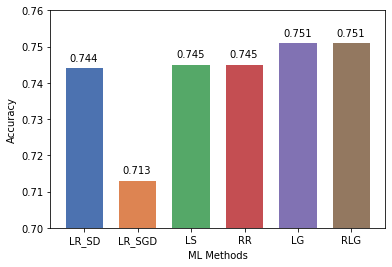

In [27]:
best_tra_accs = [0.7446, 0.7132, 0.7452, 0.7447, 0.7507, 0.7503]
best_val_accs = [0.7441, 0.7144, 0.7445, 0.7439, 0.7497, 0.7489]
best_test_accs = [0.744, 0.713, 0.745, 0.745, 0.751, 0.751]
x = np.arange(len(best_tra_accs))
plt.bar(x, best_test_accs, width=0.7, color=sns.color_palette('deep'))
for i, v in enumerate(best_test_accs):
    plt.text(x[i] - 0.28, v + 0.002, str(v))
plt.xticks(x, ('LR_SD', 'LR_SGD', 'LS', 'RR', 'LG', 'RLG'))
plt.ylim(bottom=0.7, top=0.76)
plt.xlabel('ML Methods')
plt.ylabel('Accuracy')
plt.show()

## DNN

### Training

In [28]:
from nn import *

In [29]:
# change y label from (1, -1) to (1, 0)
nn_x_train = nor_x_train[:, 1:]
nn_x_val = nor_x_val[:, 1:]
nn_x_test = nor_x_test[:, 1:]
nn_y_train = np.where(y_train == -1, 0, y_train)
nn_y_val = np.where(y_val == -1, 0, y_val)

In [30]:
# set parameters
epochs = 100
lr = 0.001
batch_size = 250

# train model, get model parameters
nn_params = train(nn_x_train.T, nn_y_train[np.newaxis,:], nn_x_val.T, nn_y_val[np.newaxis,:],
                  NN_ARCHITECTURE, epochs, lr, batch_size, verbose=True)

Epoch: 00001 - 1.0s - loss: 0.4240 - acc: 0.8028 - val_loss: 0.3910 - val_acc: 0.8220
Saving best model (epoch 3, val_loss: 0.3745)
Saving best model (epoch 4, val_loss: 0.3713)
Saving best model (epoch 5, val_loss: 0.3705)
Saving best model (epoch 7, val_loss: 0.3694)
Saving best model (epoch 8, val_acc: 0.8339)
Saving best model (epoch 9, val_acc: 0.8349)
Saving best model (epoch 9, val_loss: 0.3661)
Saving best model (epoch 11, val_loss: 0.3649)
Saving best model (epoch 13, val_acc: 0.8356)
Saving best model (epoch 15, val_acc: 0.8362)
Saving best model (epoch 15, val_loss: 0.3638)
Saving best model (epoch 17, val_acc: 0.8371)
Saving best model (epoch 18, val_loss: 0.3634)
Saving best model (epoch 26, val_acc: 0.8375)
Saving best model (epoch 26, val_loss: 0.3632)
Saving best model (epoch 30, val_loss: 0.3630)
Saving best model (epoch 33, val_acc: 0.8375)
Epoch: 00050 - 50.9s - loss: 0.3535 - acc: 0.8414 - val_loss: 0.3641 - val_acc: 0.8361
Epoch: 00100 - 44.1s - loss: 0.3491 - acc:

In [31]:
nn_params = np.load('best_acc.npy', allow_pickle=True).item()
# nn_params = np.load('best_loss.npy', allow_pickle=True).item()

In [32]:
# get final output of the model
y_train_hat, _ = full_forward_propagation(nn_x_train.T, nn_params, NN_ARCHITECTURE)
y_val_hat, _ = full_forward_propagation(nn_x_val.T, nn_params, NN_ARCHITECTURE)

# compute loss and accuracy
train_loss = compute_nn_loss(y_train_hat, nn_y_train.reshape(nn_y_train.shape[0], 1).T)
val_loss = compute_nn_loss(y_val_hat, nn_y_val.reshape(nn_y_val.shape[0], 1).T)

train_acc = compute_nn_accuracy(y_train_hat, nn_y_train.reshape(nn_y_train.shape[0], 1).T)
val_acc = compute_nn_accuracy(y_val_hat, nn_y_val.reshape(nn_y_val.shape[0], 1).T)

print('Deep neural network')
print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Deep neural network
Training Loss: 0.3528 - Training Accuracy: 0.8419
Validation Loss: 0.3632 - Validation Accuracy: 0.8375


### Testing

In [33]:
# get prediction of testing data
y_test_hat, _ = full_forward_propagation(nn_x_test.T, nn_params, NN_ARCHITECTURE)
y_test_pred = np.where(np.squeeze(y_test_hat.T) > 0.5, 1, -1)

In [34]:
OUTPUT_PATH = 'nn.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)